## Importing Libraries 

In [28]:
import numpy as np
import pandas as pd

## Reading the csv and give columns names 

In [29]:
df = pd.read_csv('Adult Train.csv', header=None)
df = df[0].str.split(', ', expand=True)
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

if len(df.columns) == len(column_names):
    df.columns = column_names
else:
    print("Number of columns in the dataset doesn't match the expected number.")

## Checking Null Values

In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Droping Irrelevant columns 
## Drop Educational Num becoz we already have their degree
## Targeting the income 

In [30]:
df.drop(['fnlwgt', 'race', 'capital-gain', 'capital-loss'], axis='columns', inplace=True)
df.drop('education-num',axis='columns',inplace=True)
target = df['income']
input = df.drop('income',axis='columns')


## Based On Age we make a new column seniority with Young , Middle age and senior person and same for hours per week part time, full time , over time after this deleting age and hours per week column 

In [31]:
input['age'] = pd.to_numeric(input['age'], errors='coerce')

conditions = [
    (input['age'] < 25),
    (input['age'] >= 25) & (input['age'] <= 60),
    (input['age'] > 60)
]
values = ['Young', 'Middle Age', 'Senior']

# Create the 'Seniority' column based on the conditions
input['Seniority'] = np.select(conditions, values, default='Unknown')


input['hours-per-week'] = pd.to_numeric(input['hours-per-week'], errors='coerce')

conditions = [
    (input['hours-per-week'] <= 20),
    (input['hours-per-week'] > 20) & (input['hours-per-week'] <= 30),
    (input['hours-per-week'] > 30)
]
values = ['Part Time ', 'Full Time', 'Over Time']

# Create the 'Seniority' column based on the conditions
input['Work_type'] = np.select(conditions, values, default='Unknown')



In [32]:
input = input.drop(['age', 'hours-per-week'], axis='columns')

## Now Mergning martial status , relationshiup, and gender for removing dimension

In [33]:
input['marital_relation_sex'] = input['marital-status'] + '_' + input['relationship'] + '_' + input['sex']
input = input.drop(['marital-status', 'relationship', 'sex'], axis='columns')



## Encoding the values and target 

In [34]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the specified columns
input['workclass_encoded'] = label_encoder.fit_transform(input['workclass'])
input['education_encoded'] = label_encoder.fit_transform(input['education'])
input['occupation_encoded'] = label_encoder.fit_transform(input['occupation'])
input['native-country_encoded'] = label_encoder.fit_transform(input['native-country'])
input['Seniority_encoded'] = label_encoder.fit_transform(input['Seniority'])
input['Work_type_encoded'] = label_encoder.fit_transform(input['Work_type'])
input['marital_relation_sex_encoded'] = label_encoder.fit_transform(input['marital_relation_sex'])


# Drop the original categorical columns
input = input.drop(['workclass', 'education', 'occupation', 'native-country', 'Seniority', 'Work_type', 'marital_relation_sex'], axis='columns')

In [35]:
encoded_target = label_encoder.fit_transform(target)


## Importing k means Clustering

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)

In [37]:
knn.fit(input, encoded_target)

KNeighborsClassifier(n_neighbors=35)

## Doing the Same preprosessing for testing csv 

In [38]:
df_test = pd.read_csv('Adult Test.csv', header=None)
df_test = df_test[0].str.split(', ', expand=True)
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
if len(df_test.columns) == len(column_names):
    df_test.columns = column_names
else:
    print("Number of columns in the dataset doesn't match the expected number.")



In [39]:
df_test.drop(['fnlwgt', 'race', 'capital-gain', 'capital-loss'], axis='columns', inplace=True)
df_test.drop('education-num',axis='columns',inplace=True)
target_test = df_test['income']
input_test = df_test.drop('income',axis='columns')



In [40]:
input_test['age'] = pd.to_numeric(input_test['age'], errors='coerce')

conditions = [
    (input_test['age'] < 25),
    (input_test['age'] >= 25) & (input_test['age'] <= 60),
    (input_test['age'] > 60)
]
values = ['Young', 'Middle Age', 'Senior']

input_test['Seniority'] = np.select(conditions, values, default='Unknown')

input_test['hours-per-week'] = pd.to_numeric(input_test['hours-per-week'], errors='coerce')

conditions = [
    (input_test['hours-per-week'] <= 20),
    (input_test['hours-per-week'] > 20) & (input_test['hours-per-week'] <= 30),
    (input_test['hours-per-week'] > 30)
]
values = ['Part Time', 'Full Time', 'Over Time']

input_test['Work_type'] = np.select(conditions, values, default='Unknown')
input_test = input_test.drop(['age', 'hours-per-week'], axis='columns')

In [41]:
input_test['marital_relation_sex'] = input_test['marital-status'] + '_' + input_test['relationship'] + '_' + input_test['sex']
input_test = input_test.drop(['marital-status', 'relationship', 'sex'], axis='columns')

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the specified columns
input_test['workclass_encoded'] = label_encoder.fit_transform(input_test['workclass'])
input_test['education_encoded'] = label_encoder.fit_transform(input_test['education'])
input_test['occupation_encoded'] = label_encoder.fit_transform(input_test['occupation'])
input_test['native-country_encoded'] = label_encoder.fit_transform(input_test['native-country'])
input_test['Seniority_encoded'] = label_encoder.fit_transform(input_test['Seniority'])
input_test['Work_type_encoded'] = label_encoder.fit_transform(input_test['Work_type'])
input_test['marital_relation_sex_encoded'] = label_encoder.fit_transform(input_test['marital_relation_sex'])

# Drop the original categorical columns
input_test = input_test.drop(['workclass', 'education', 'occupation', 'native-country', 'Seniority', 'Work_type', 'marital_relation_sex'], axis='columns')

encoded_target = label_encoder.fit_transform(target_test)


## Now Predicting the Testing Values

In [43]:
predicted = knn.predict(input_test)

## Checking Confusion MAtrix

In [44]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(predicted,encoded_target)

Text(95.72222222222221, 0.5, 'Truth')

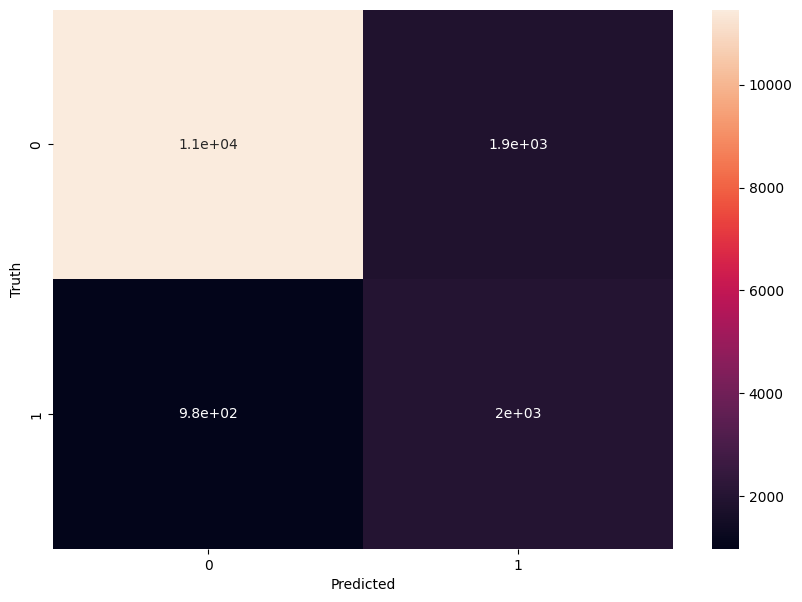

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Accuracy score

In [46]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(predicted,encoded_target)
ac

0.8251335913027456